## Источник данных
Данные для исследования были взяты с популярного ресурса для машинного обучения kaggle.com
<br>Страница с датасетом: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

## Необходимые библиотеки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import xgboost as xgb
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
pd.options.display.max_columns = None

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

## Обработка данных

In [130]:
movies = pd.read_csv('./data/movies_metadata.csv', low_memory=False)
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

## Общая характеристика набора данных

In [131]:
#количество наблюдений
movies.size

1091184

In [132]:
#количество признаков
len(movies.columns)

24

<p>•	adult – булевое значение, отвечающее за то, если ли у этого фильма возрастное ограничение 18+
<p>•	belongs_to_collection – здесь собраны данные о нахождении фильмов в каких-то франшизах. Если фильм не состоит в франшизе, значение в этом столбце пропущено
<p>•	budget – бюджет фильма
<p>•	genres – жанры фильма
<p>•	homepage – ссылка на официальный сайт фильма, если такой присутствует 
<p>•	id – идентификатор фильма
<p>•	imdb_id – идентификатор фильма на другой платформе
<p>•	original_language – язык, на котором был снят фильм
<p>•	original_title – название фильма на языке оригинала
<p>•	overview – краткое описание фильма
<p>•	popularity – насколько популярен фильм
<p>•	poster_path – путь до картинки с постером фильма
<p>•	production_companies – компании, участвовавшие в создании фильма
<p>•	production_countries – страны, участвовавшие в создании фильма
<p>•	release_date – дата релиза
<p>•	revenue – доходы с фильма
<p>•	runtime – время длительности фильма
<p>•	spoken_languages – языки, на которые был переведён фильм
<p>•	status – статус фильма (выпущен, пост продакшн и т.д.)
<p>•	tagline – подзаголовок фильма
<p>•	title – название фильма на английском языке
<p>•	vote_average – средний балл среди отзывов пользователей
<p>•	vote_count – количество отзывов на фильм

Предметная область - рейтинги фильмов

In [133]:
#характер целевой переменной
movies['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

Задача обучения - регрессия

## Описательный анализ

In [134]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

#### Удалим ненужные столбцы

In [135]:
movies.drop('poster_path', axis='columns', inplace=True)

In [136]:
#удаляем доходы, так как мы не можем их знать при прогнозе новых фильмов
movies.drop('revenue', axis='columns', inplace=True)

In [137]:
movies.drop('video', axis='columns', inplace=True)

In [138]:
movies.drop('homepage', axis='columns', inplace=True)

In [139]:
movies.drop('overview', axis='columns', inplace=True)

In [140]:
movies.drop('imdb_id', axis='columns', inplace=True)

In [141]:
movies.drop('original_title', axis='columns', inplace=True)

In [142]:
#удаляем по той же причине, что и revenue
movies.drop('popularity', axis='columns', inplace=True)

In [143]:
movies.drop('tagline', axis='columns', inplace=True)

In [144]:
movies.drop('release_date', axis='columns', inplace=True)

Удалим фильмы, у которых отсутствует название

In [145]:
movies.dropna(subset=['title'], inplace=True)

In [146]:
#Проверим снова на пропущенные значения
movies.isnull().sum()

adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
id                           0
original_language           11
production_companies         0
production_countries         0
runtime                    257
spoken_languages             0
status                      81
title                        0
vote_average                 0
vote_count                   0
dtype: int64

### Исследование шкалы измерения каждого существенного признака

In [147]:
movies['budget'] = movies['budget'].astype(int)

In [148]:
movies['budget'].describe()

count    4.546000e+04
mean     4.224858e+06
std      1.742467e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

<AxesSubplot:>

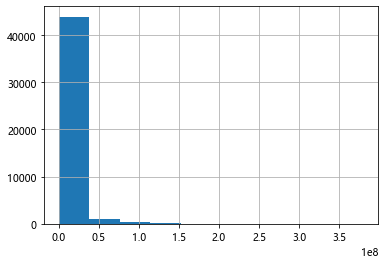

In [149]:
movies['budget'].hist()

Значений бюджета - 0 очень много, поэтому я считаю что это лишние(неверные) данные, которые нужно удалить

In [150]:
movies = movies[movies['budget'] != 0]

<AxesSubplot:>

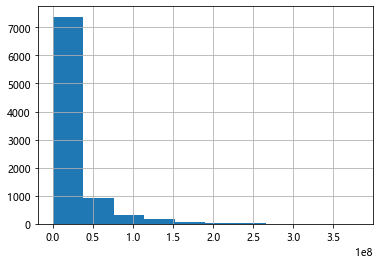

In [151]:
movies['budget'].hist()

In [152]:
movies['adult'].value_counts()

False    8889
True        1
Name: adult, dtype: int64

In [153]:
movies['adult'] = movies['adult'].apply(lambda x: 1 if eval(x) else 0)
movies['adult'].head()

0    0
1    0
3    0
5    0
6    0
Name: adult, dtype: int64

In [154]:
movies['adult'].value_counts()

0    8889
1       1
Name: adult, dtype: int64

Почти все фильмы не имеют ограничение по возрасту, поэтому этот столбец так же можно удалить

In [155]:
movies.drop('adult', axis='columns', inplace=True)

Заменим в столбце belongs_to_collection 0 если там отсутсвует значение (т.е. фильм не входит в франшизу) и 1 если значение какое-то есть

In [156]:
movies['belongs_to_collection'].isnull().sum()

7305

In [157]:
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: 1 if type(x) == str else 0)
movies['belongs_to_collection'].head()

0    1
1    0
3    0
5    0
6    0
Name: belongs_to_collection, dtype: int64

In [158]:
movies['belongs_to_collection'].value_counts()

0    7305
1    1585
Name: belongs_to_collection, dtype: int64

Разберёмся, какие есть жанры и какие можно отбросить из-за их малого количества

In [159]:
movies['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [160]:
genres = {}
for i in range(movies.shape[0]):
    temp_genres = eval(f"{movies['genres'].iloc[i]}")
    for g in temp_genres:
        genres[g['name']] = genres.get(g['name'], 0) + 1

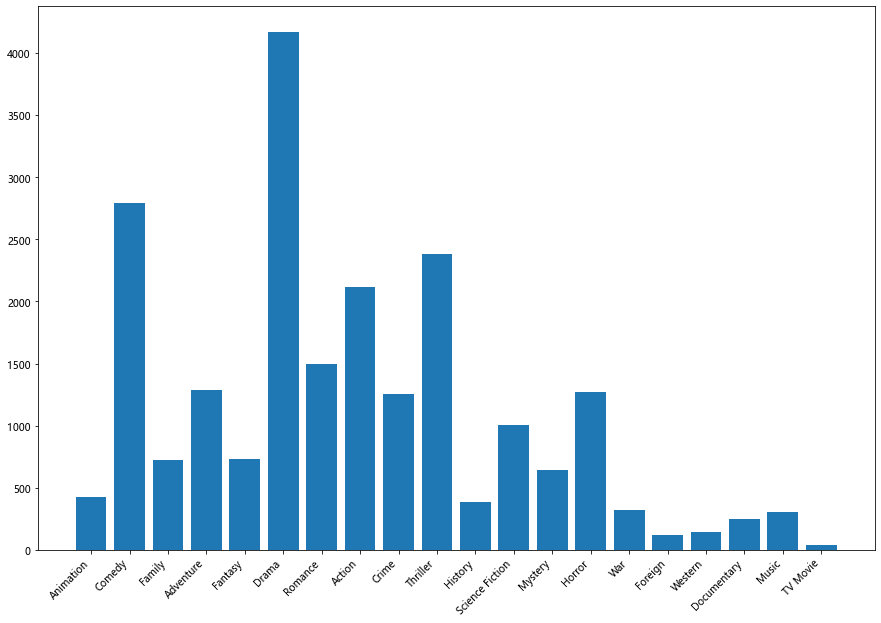

In [161]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(genres.keys(), genres.values())
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.show()

Минимальное количество - 766, поэтому никакие жанры удалять не будем
<br> Для каждого жанра выделим по столбцу и отметим там присутсвие этого жанра в фильме

In [162]:
for g in genres.keys():
    temp_df = movies['genres'].apply(lambda x: 1 if g in x else 0)
    movies[f'is_{g}'] = temp_df
movies = movies.copy()
movies.head()

,belongs_to_collection,budget,genres,id,original_language,production_companies,production_countries,runtime,spoken_languages,status,title,vote_average,vote_count,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_TV Movie
0,1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886.0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
6,0,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,en,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
movies.drop('genres', axis='columns', inplace=True)

Проведём анализ языков, на которох был снят фильм

In [164]:
movies['original_language'].value_counts()

en    7434
fr     240
ru     139
hi     131
es     113
de      96
ja      84
it      83
ko      67
zh      65
fi      63
da      36
ta      34
pt      34
cn      33
sv      28
nl      27
no      23
pl      19
ml      15
sr      13
th      11
tr      10
te      10
he      10
ro       9
hu       7
fa       4
et       4
id       4
el       4
mr       3
sl       3
cs       3
is       3
xx       2
lv       2
uk       2
ar       2
lo       2
ur       2
nb       2
ca       2
vi       2
ku       1
la       1
bg       1
kn       1
bs       1
bm       1
af       1
sq       1
ps       1
bo       1
Name: original_language, dtype: int64

Исключим языки с количеством фильмов < 100 и пропущенные значения

In [165]:
lang = movies['original_language'].value_counts()
lang = lang[lang >= 100]
movies = movies[movies['original_language'].isin(list(lang.index))].dropna(subset=['original_language'])

In [166]:
movies['original_language'].value_counts()

en    7434
fr     240
ru     139
hi     131
es     113
Name: original_language, dtype: int64

In [167]:
movies.drop('original_language', axis='columns', inplace=True)

Разберёмся, какие есть компании и страны создатели

In [168]:
companies = {}
for i in range(movies.shape[0]):
    temp_companies = eval(f"{movies['production_companies'].iloc[i]}")
    for g in temp_companies:
        companies[g['name']] = companies.get(g['name'], 0) + 1
for c in list(companies.keys()):
    if companies[c] < 50:
        del companies[c]

Оставим только компании, у которых было больше 50 фильмов за всё время

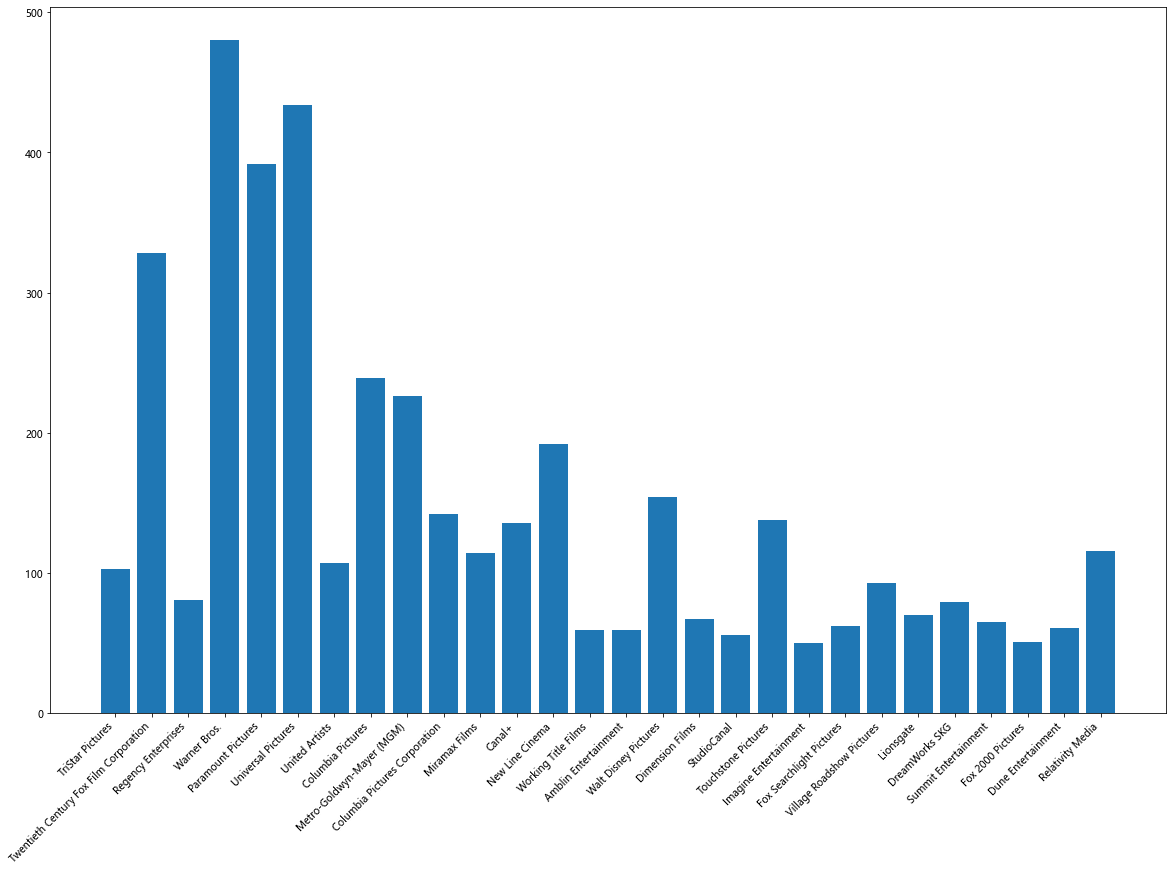

In [169]:
fig, ax = plt.subplots(figsize=(20,13))
ax.bar(companies.keys(), companies.values())
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.show()

In [170]:
for c in companies.keys():
    temp_df = movies['production_companies'].apply(lambda x: 1 if c in x else 0)
    movies[f'company_{c}'] = temp_df
    movies = movies.copy()
movies.head()

,belongs_to_collection,budget,id,production_companies,production_countries,runtime,spoken_languages,status,title,vote_average,vote_count,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_TV Movie,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_Regency Enterprises,company_Warner Bros.,company_Paramount Pictures,company_Universal Pictures,company_United Artists,company_Columbia Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Columbia Pictures Corporation,company_Miramax Films,company_Canal+,company_New Line Cinema,company_Working Title Films,company_Amblin Entertainment,company_Walt Disney Pictures,company_Dimension Films,company_StudioCanal,company_Touchstone Pictures,company_Imagine Entertainment,company_Fox Searchlight Pictures,company_Village Roadshow Pictures,company_Lionsgate,company_DreamWorks SKG,company_Summit Entertainment,company_Fox 2000 Pictures,company_Dune Entertainment,company_Relativity Media
0,1,30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000,8844,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000,31357,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000,949,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886.0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,58000000,11860,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
country = {}
for i in range(movies.shape[0]):
    temp_country = eval(f"{movies['production_countries'].iloc[i]}")
    for g in temp_country:
        country[g['name']] = country.get(g['name'], 0) + 1
for c in list(country.keys()):
    if country[c] < 15:
        del country[c]

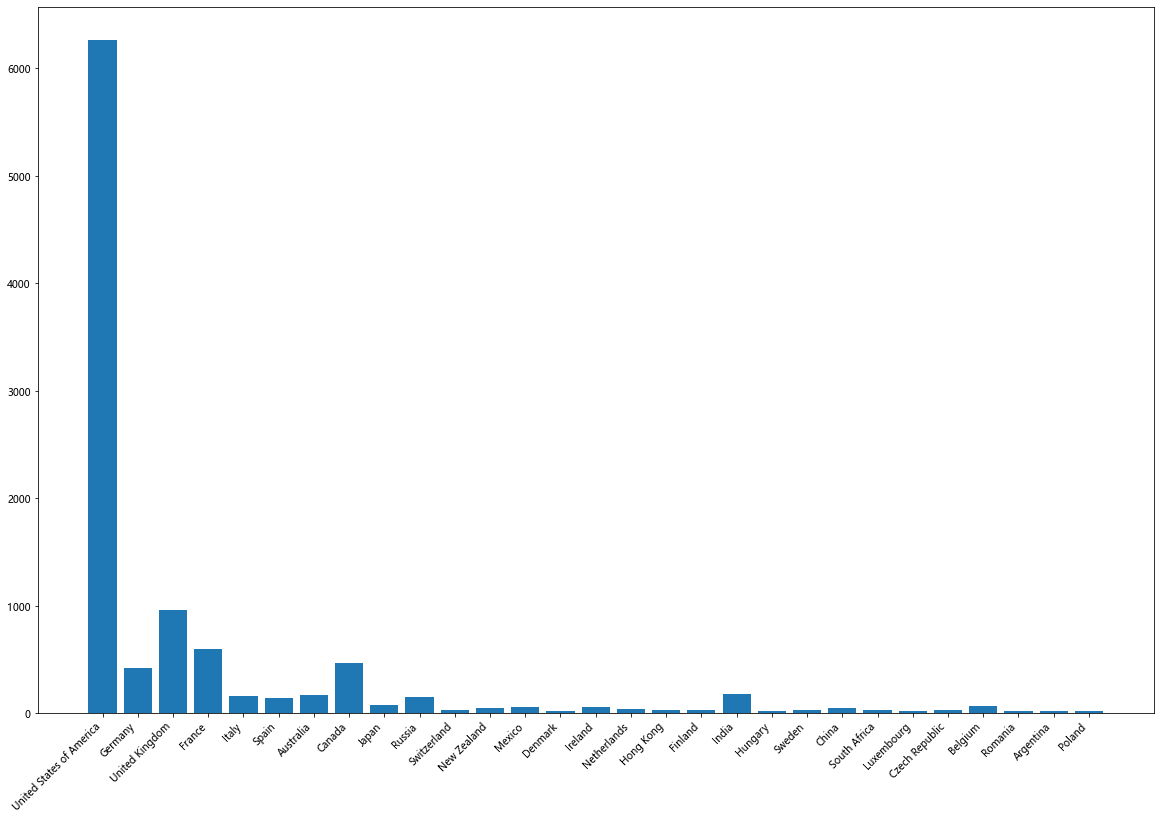

In [172]:
fig, ax = plt.subplots(figsize=(20,13))
ax.bar(country.keys(), country.values())
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.show()

In [173]:
for c in country.keys():
    temp_df = movies['production_countries'].apply(lambda x: 1 if c in x else 0)
    movies[f'country_{c}'] = temp_df
movies = movies.copy()
movies.head()

,belongs_to_collection,budget,id,production_companies,production_countries,runtime,spoken_languages,status,title,vote_average,vote_count,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_TV Movie,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_Regency Enterprises,company_Warner Bros.,company_Paramount Pictures,company_Universal Pictures,company_United Artists,company_Columbia Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Columbia Pictures Corporation,company_Miramax Films,company_Canal+,company_New Line Cinema,company_Working Title Films,company_Amblin Entertainment,company_Walt Disney Pictures,company_Dimension Films,company_StudioCanal,company_Touchstone Pictures,company_Imagine Entertainment,company_Fox Searchlight Pictures,company_Village Roadshow Pictures,company_Lionsgate,company_DreamWorks SKG,company_Summit Entertainment,company_Fox 2000 Pictures,company_Dune Entertainment,company_Relativity Media,country_United States of America,country_Germany,country_United Kingdom,country_France,country_Italy,country_Spain,country_Australia,country_Canada,country_Japan,country_Russia,country_Switzerland,country_New Zealand,country_Mexico,country_Denmark,country_Ireland,country_Netherlands,country_Hong Kong,country_Finland,country_India,country_Hungary,country_Sweden,country_China,country_South Africa,country_Luxembourg,country_Czech Republic,country_Belgium,country_Romania,country_Argentina,country_Poland
0,1,30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000,8844,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000,31357,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000,949,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886.0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,58000000,11860,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
movies.drop('production_companies', axis='columns', inplace=True)
movies.drop('production_countries', axis='columns', inplace=True)

In [175]:
movies.head()

,belongs_to_collection,budget,id,runtime,spoken_languages,status,title,vote_average,vote_count,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_TV Movie,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_Regency Enterprises,company_Warner Bros.,company_Paramount Pictures,company_Universal Pictures,company_United Artists,company_Columbia Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Columbia Pictures Corporation,company_Miramax Films,company_Canal+,company_New Line Cinema,company_Working Title Films,company_Amblin Entertainment,company_Walt Disney Pictures,company_Dimension Films,company_StudioCanal,company_Touchstone Pictures,company_Imagine Entertainment,company_Fox Searchlight Pictures,company_Village Roadshow Pictures,company_Lionsgate,company_DreamWorks SKG,company_Summit Entertainment,company_Fox 2000 Pictures,company_Dune Entertainment,company_Relativity Media,country_United States of America,country_Germany,country_United Kingdom,country_France,country_Italy,country_Spain,country_Australia,country_Canada,country_Japan,country_Russia,country_Switzerland,country_New Zealand,country_Mexico,country_Denmark,country_Ireland,country_Netherlands,country_Hong Kong,country_Finland,country_India,country_Hungary,country_Sweden,country_China,country_South Africa,country_Luxembourg,country_Czech Republic,country_Belgium,country_Romania,country_Argentina,country_Poland
0,1,30000000,862,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000,8844,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000,31357,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000,949,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886.0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,58000000,11860,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Составим такие же столбцы для языков озвучки

In [178]:
lang = {}
for i in range(movies.shape[0]):
    temp_lang = eval(f"{movies['spoken_languages'].iloc[i]}")
    for g in temp_lang:
        lang[g['name']] = lang.get(g['name'], 0) + 1
for l in list(lang.keys()):
    if lang[l] < 250:
        del lang[l]

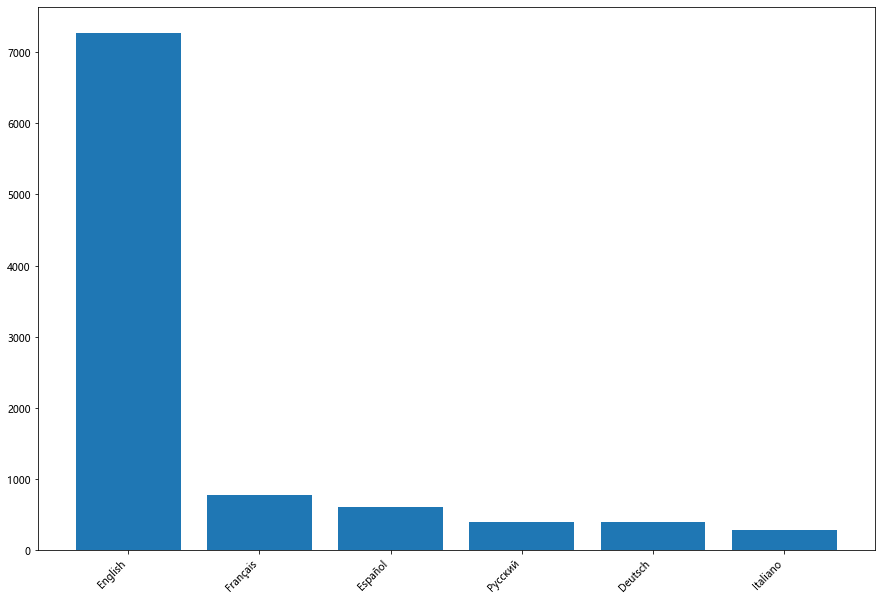

In [179]:
import matplotlib
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(lang.keys(), lang.values())
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.show()

In [180]:
for l in lang.keys():
    temp_df = movies['spoken_languages'].apply(lambda x: 1 if l in x else 0)
    movies[f'lang_{l}'] = temp_df
movies = movies.copy()
movies.head()

,belongs_to_collection,budget,id,runtime,spoken_languages,status,title,vote_average,vote_count,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_TV Movie,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_Regency Enterprises,company_Warner Bros.,company_Paramount Pictures,company_Universal Pictures,company_United Artists,company_Columbia Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Columbia Pictures Corporation,company_Miramax Films,company_Canal+,company_New Line Cinema,company_Working Title Films,company_Amblin Entertainment,company_Walt Disney Pictures,company_Dimension Films,company_StudioCanal,company_Touchstone Pictures,company_Imagine Entertainment,company_Fox Searchlight Pictures,company_Village Roadshow Pictures,company_Lionsgate,company_DreamWorks SKG,company_Summit Entertainment,company_Fox 2000 Pictures,company_Dune Entertainment,company_Relativity Media,country_United States of America,country_Germany,country_United Kingdom,country_France,country_Italy,country_Spain,country_Australia,country_Canada,country_Japan,country_Russia,country_Switzerland,country_New Zealand,country_Mexico,country_Denmark,country_Ireland,country_Netherlands,country_Hong Kong,country_Finland,country_India,country_Hungary,country_Sweden,country_China,country_South Africa,country_Luxembourg,country_Czech Republic,country_Belgium,country_Romania,country_Argentina,country_Poland,lang_English,lang_Français,lang_Español,lang_Pусский,lang_Deutsch,lang_Italiano
0,1,30000000,862,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,65000000,8844,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,16000000,31357,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,60000000,949,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886.0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6,0,58000000,11860,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [181]:
movies.drop('spoken_languages', axis='columns', inplace=True)

Проверка, какие есть статусы фильмов

In [182]:
movies['status'].value_counts()

Released           8034
Post Production      11
Rumored               9
Name: status, dtype: int64

In [183]:
movies = movies[movies['status']=='Released']
movies.drop('status', axis='columns', inplace=True)

Проверка на пустые значения в времени фильма

In [184]:
movies['runtime'].isnull().sum()

2

In [185]:
movies['runtime'] = movies['runtime'].fillna(value=0)

In [186]:
movies.head()

,belongs_to_collection,budget,id,runtime,title,vote_average,vote_count,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_TV Movie,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_Regency Enterprises,company_Warner Bros.,company_Paramount Pictures,company_Universal Pictures,company_United Artists,company_Columbia Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Columbia Pictures Corporation,company_Miramax Films,company_Canal+,company_New Line Cinema,company_Working Title Films,company_Amblin Entertainment,company_Walt Disney Pictures,company_Dimension Films,company_StudioCanal,company_Touchstone Pictures,company_Imagine Entertainment,company_Fox Searchlight Pictures,company_Village Roadshow Pictures,company_Lionsgate,company_DreamWorks SKG,company_Summit Entertainment,company_Fox 2000 Pictures,company_Dune Entertainment,company_Relativity Media,country_United States of America,country_Germany,country_United Kingdom,country_France,country_Italy,country_Spain,country_Australia,country_Canada,country_Japan,country_Russia,country_Switzerland,country_New Zealand,country_Mexico,country_Denmark,country_Ireland,country_Netherlands,country_Hong Kong,country_Finland,country_India,country_Hungary,country_Sweden,country_China,country_South Africa,country_Luxembourg,country_Czech Republic,country_Belgium,country_Romania,country_Argentina,country_Poland,lang_English,lang_Français,lang_Español,lang_Pусский,lang_Deutsch,lang_Italiano
0,1,30000000,862,81.0,Toy Story,7.7,5415.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,65000000,8844,104.0,Jumanji,6.9,2413.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,16000000,31357,127.0,Waiting to Exhale,6.1,34.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,60000000,949,170.0,Heat,7.7,1886.0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6,0,58000000,11860,127.0,Sabrina,6.2,141.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [187]:
#название не нужно
movies.drop('title', axis='columns', inplace=True)

Оставим только те фильмы, у которых больше 100 отзывов

In [188]:
movies = movies[movies['vote_count'] > 100]

Исправим типы данных budget и id

In [189]:
movies['budget'] = movies['budget'].astype(int)

In [190]:
movies.dtypes

belongs_to_collection      int64
budget                     int32
id                        object
runtime                  float64
vote_average             float64
                          ...   
lang_Français              int64
lang_Español               int64
lang_Pусский               int64
lang_Deutsch               int64
lang_Italiano              int64
Length: 89, dtype: object

In [191]:
movies['id'] = movies['id'].astype(int)

### Построим матрицу зависимостей таблиц между собой

In [192]:
movies = movies.set_index('id')
movies.drop('vote_count', axis='columns', inplace=True)
col = list(movies.columns)
col.remove('vote_average')
col.append('vote_average')
movies = movies.reindex(columns=col)
movies.head()

,belongs_to_collection,budget,runtime,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_TV Movie,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_Regency Enterprises,company_Warner Bros.,company_Paramount Pictures,company_Universal Pictures,company_United Artists,company_Columbia Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Columbia Pictures Corporation,company_Miramax Films,company_Canal+,company_New Line Cinema,company_Working Title Films,company_Amblin Entertainment,company_Walt Disney Pictures,company_Dimension Films,company_StudioCanal,company_Touchstone Pictures,company_Imagine Entertainment,company_Fox Searchlight Pictures,company_Village Roadshow Pictures,company_Lionsgate,company_DreamWorks SKG,company_Summit Entertainment,company_Fox 2000 Pictures,company_Dune Entertainment,company_Relativity Media,country_United States of America,country_Germany,country_United Kingdom,country_France,country_Italy,country_Spain,country_Australia,country_Canada,country_Japan,country_Russia,country_Switzerland,country_New Zealand,country_Mexico,country_Denmark,country_Ireland,country_Netherlands,country_Hong Kong,country_Finland,country_India,country_Hungary,country_Sweden,country_China,country_South Africa,country_Luxembourg,country_Czech Republic,country_Belgium,country_Romania,country_Argentina,country_Poland,lang_English,lang_Français,lang_Español,lang_Pусский,lang_Deutsch,lang_Italiano,vote_average
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,1,30000000,81.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.7
8844,0,65000000,104.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,6.9
949,0,60000000,170.0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,7.7
11860,0,58000000,127.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,6.2
9091,0,35000000,106.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.5


In [193]:
movies[list(movies.columns)[:4] + ['vote_average']].corr()

,belongs_to_collection,budget,runtime,is_Animation,vote_average
belongs_to_collection,1.000000,0.177080,-0.083687,0.103047,-0.118068
budget,0.177080,1.000000,0.246045,0.180652,-0.071205
runtime,-0.083687,0.246045,1.000000,-0.224783,0.319924
is_Animation,0.103047,0.180652,-0.224783,1.000000,0.053255
vote_average,-0.118068,-0.071205,0.319924,0.053255,1.000000


<AxesSubplot:>

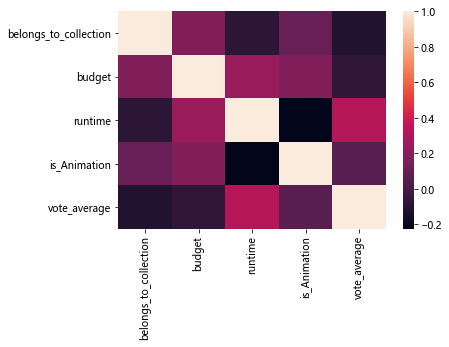

In [194]:
sns.heatmap(movies[list(movies.columns)[:4] + ['vote_average']].corr())

# Обучение модели машинного обучения

In [195]:
X = movies.drop(['vote_average'], axis='columns')
y = movies['vote_average']

In [196]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [197]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('RMSE train ' + str(np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))))
print('RMSE test ' + str(np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))))

RMSE train 0.696561095759803
RMSE test 0.7590681545348605


In [198]:
#имеет превосходную точность на обучаемой выборке, но плохую на тестовой
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print('RMSE train ' + str(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE test ' + str(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

RMSE train 0.02604428735924967
RMSE test 0.9184101579498235


In [199]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
print('RMSE train ' + str(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE test ' + str(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

RMSE train 0.784570280334237
RMSE test 0.8147529590175776


In [200]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
print('RMSE train ' + str(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE test ' + str(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

RMSE train 0.7837366191283157
RMSE test 0.8122380772943232


In [201]:
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror',
                             max_depth = 3,
                             learning_rate = 0.1,
                             n_estimators = 100,
                             booster = 'gbtree',
                             gamma = 0.01, 
                             max_delta_step = 5, 
                             reg_alpha = 0.1, 
                             reg_lambda = 1)

model_xgb.fit(X_train, y_train)

print('RMSE train ' + str(np.sqrt(mean_squared_error(y_train, model_xgb.predict(X_train)))))
print('RMSE test ' + str(np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))))

RMSE train 0.6182692349261203
RMSE test 0.7062371391620262


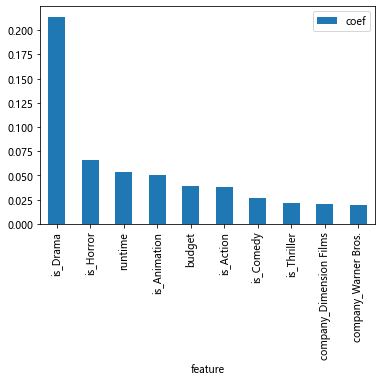

In [202]:
xgb_regr_coef = pd.DataFrame(columns = ['feature', 'coef'])
xgb_regr_coef['feature'] = np.array(X.columns)
xgb_regr_coef['coef'] = abs(model_xgb.feature_importances_)
xgb_regr_coef = xgb_regr_coef.set_index('feature')
xgb_regr_coef.sort_values(by = ['coef'], ascending = False).head(10).plot.bar()
plt.show()

Модель XGBoost Regressor очевидно лучше справляется с задачей
<br>Давайте посмотрим на то, насколько сильно она может ошибаться

In [203]:
prediction = model_xgb.predict(X_test)
np.array(prediction)

array([6.6761856, 5.610199 , 6.839607 , 6.9058743, 5.906978 , 6.340982 ,
       6.448956 , 6.8513017, 6.1145425, 6.477344 , 5.83411  , 5.6534305,
       5.8943224, 5.834126 , 5.8714433, 6.0587025, 6.7510557, 7.4784713,
       7.0210485, 6.0779324, 6.8668017, 6.6367083, 5.670434 , 6.2827563,
       6.1467304, 5.765077 , 7.2602873, 6.1807504, 7.07033  , 6.672466 ,
       5.942521 , 6.467968 , 5.9309773, 5.4950094, 6.487069 , 6.1979265,
       5.844746 , 7.1638484, 6.254288 , 6.521436 , 6.900064 , 6.0831523,
       5.6705227, 6.289302 , 6.1488905, 5.6705227, 6.0164785, 5.953962 ,
       6.6502347, 6.1740184, 7.009821 , 6.4900303, 6.357013 , 7.0283203,
       6.393107 , 6.4983964, 6.2638245, 5.6361876, 5.8446183, 6.8801785,
       6.5393667, 5.795058 , 6.454388 , 6.1232424, 6.516561 , 6.630366 ,
       5.892747 , 6.8172846, 6.271995 , 6.35599  , 6.1064696, 6.7486653,
       6.515662 , 6.752803 , 6.901063 , 6.0461855, 7.377816 , 7.208918 ,
       5.6423025, 6.550817 , 6.408662 , 6.460117 , 

In [204]:
target = np.array(y_test)
target

array([7.6, 5.9, 6.9, 7.1, 4.5, 5.5, 5.6, 5.8, 6.2, 6.6, 6.5, 4.5, 6.4,
       5.9, 6.2, 5.3, 4.5, 7.4, 6.7, 5.9, 7.9, 6.8, 6.7, 5.9, 6.5, 6.2,
       5.3, 7.3, 7.4, 6.2, 4.9, 6.7, 6.2, 6. , 6.8, 5.3, 5.4, 6.7, 6.5,
       6.6, 7.4, 6.1, 6.6, 6. , 6. , 6.2, 5.8, 5.9, 7. , 4.9, 6.4, 6.1,
       6.1, 8.1, 5.5, 7.2, 5.2, 6.3, 6.2, 7.6, 5.9, 5.6, 6.5, 6.1, 5.8,
       5.7, 5.8, 7.9, 6.7, 5.6, 6.6, 8. , 7.2, 6.5, 6.8, 6.6, 8.2, 6.6,
       5. , 6.3, 5.2, 7.2, 6.1, 7.5, 6.5, 7.6, 4.4, 7.2, 7. , 5.3, 5.8,
       6.3, 5.5, 4.4, 5.6, 6.7, 6.7, 6.8, 5.6, 7.9, 6.8, 7.1, 5.3, 6.3,
       5.3, 7.6, 7. , 7.4, 6.8, 6.6, 6. , 4.4, 6. , 7. , 7.4, 7.5, 3.7,
       6. , 6.5, 5.4, 5.6, 7.1, 7.7, 6.7, 5.4, 6.4, 5.8, 4.9, 5.9, 6.4,
       6.4, 5.6, 5.4, 5.8, 7.5, 6.6, 6.1, 5.1, 7.5, 6.7, 5.2, 5.8, 5.5,
       6.7, 6.4, 5.4, 8.1, 7.2, 6.7, 5.7, 6.4, 6.2, 5.6, 7.2, 6. , 6.8,
       7.2, 7.2, 6.8, 5.8, 7.1, 7.1, 6.3, 6.9, 7.5, 6.5, 7.1, 6. , 5.9,
       7.3, 5.8, 7.1, 7.3, 6.1, 6.2, 7.7, 6.8, 5.7, 7. , 5.7, 6.

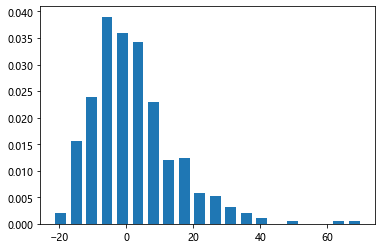

In [208]:
miss = (prediction - target)/target * 100
plt.hist(miss, bins=20, rwidth=0.7, density=True)
plt.show()

In [209]:
len(miss[abs(miss) <= 15])/len(miss)

0.815347721822542

81,5% рейтингов фильмов из тестовой выборки были предсказаны с точностью 15%

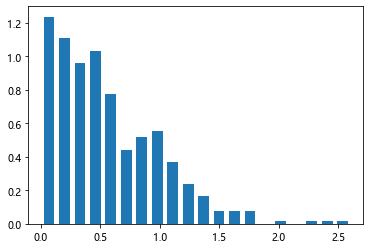

In [211]:
miss = abs(prediction - target)
plt.hist(miss, bins=20, rwidth=0.7, density=True)
plt.show()

In [212]:
len(miss[abs(miss) <= 1])/len(miss)

0.8369304556354916

у 83,7% рейтингов фильмов из тестовой выборки были предсказаны рейтинги с отклонением не больше чем 1